In [ ]:
import pandas as pd

df = pd.read_csv('dados_arduino_pid6(1).csv', encoding='ISO-8859-1') #pid5
df = df.rename(columns={'Tempo_s': 'Tempo_µs'})
display(df.head(10))

df['Vel_Real_Media'] = df['Vel_Real'].rolling(window=10).mean()
df = df.dropna(subset=['Vel_Real_Media'])
display(df.head(10))

,Tempo_µs,Ciclo_CPU,Referencia_Motor,Vel_Real
0,956.0,0.0,0.0,0.0
1,1964.0,0.0,0.0,0.0
2,3008.0,0.0,0.0,0.0
3,4068.0,0.0,0.0,0.0
4,5112.0,0.0,0.0,0.0
5,6180.0,0.0,0.0,0.0
6,7224.0,0.0,0.0,0.0
7,8276.0,0.0,0.0,0.0
8,9328.0,0.0,0.0,0.0
9,10380.0,0.0,0.0,0.0


,Tempo_µs,Ciclo_CPU,Referencia_Motor,Vel_Real,Vel_Real_Media
9,10380.0,0.0,0.0,0.0,0.0
10,11476.0,0.0,0.0,0.0,0.0
11,12912.0,0.0,0.0,0.0,0.0
12,14516.0,0.0,0.0,0.0,0.0
13,16140.0,0.0,0.0,0.0,0.0
14,17748.0,0.0,0.0,0.0,0.0
15,19368.0,0.0,0.0,0.0,0.0
16,20976.0,0.0,0.0,0.0,0.0
17,22600.0,0.0,0.0,0.0,0.0
18,24208.0,0.0,0.0,0.0,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


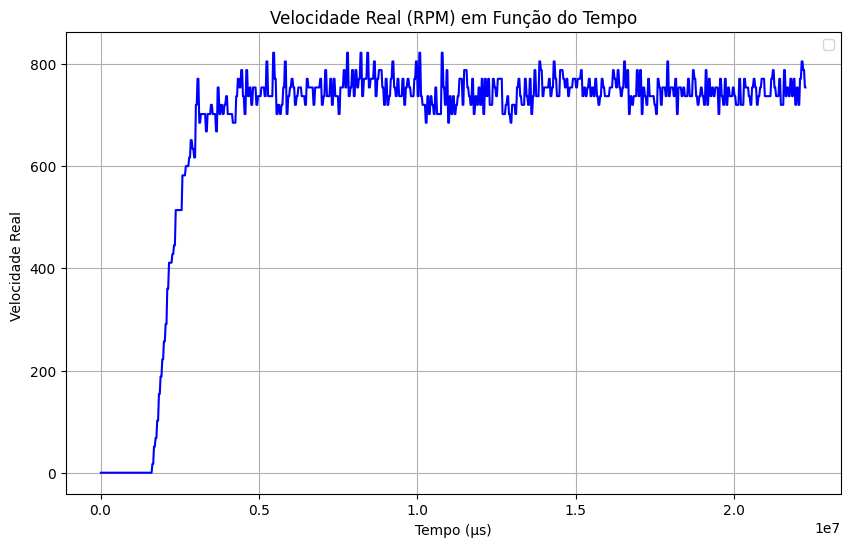

In [224]:
import matplotlib.pyplot as plt


# Criar o gráfico
plt.figure(figsize=(10, 6))  # Tamanho da figura
plt.plot(df['Tempo_µs'], df['Vel_Real_Media'], color='b')
# Adicionar título e rótulos aos eixos
plt.title('Velocidade Real (RPM) em Função do Tempo')
plt.xlabel('Tempo (µs)')
plt.ylabel('Velocidade Real ')
# Mostrar a legenda
plt.legend()
# Mostrar o gráfico
plt.grid(True)  # Adicionar uma grade ao gráfico
plt.show()

In [225]:
df['Vel_Real'] = df['Vel_Real_Media']
df = df[df['Vel_Real'].notna()]
df['Tempo_µs'] = df['Tempo_µs'] / 1e6 # Passar para segundos
df = df.reset_index(drop=True)
display(df.head()) 
print(df['Vel_Real'].max())

,Tempo_µs,Ciclo_CPU,Referencia_Motor,Vel_Real,Vel_Real_Media
0,0.010380,0.0,0.0,0.0,0.0
1,0.011476,0.0,0.0,0.0,0.0
2,0.012912,0.0,0.0,0.0,0.0
3,0.014516,0.0,0.0,0.0,0.0
4,0.016140,0.0,0.0,0.0,0.0


822.0


TransferFunction(array([0.33872565, 1.917315  ]), array([0.0415, 1.    , 0.    ]))

TransferFunction(array([0.33872565, 1.917315  ]), array([0.0415    , 1.33872565, 1.917315  ]))

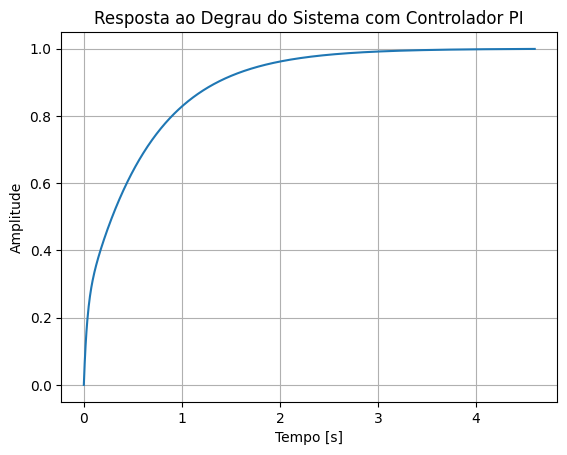

In [226]:
import control as ctrl
import matplotlib.pyplot as plt

# Definindo a função de transferência do sistema original G(s)
numerador_G = [63.9105]
denominador_G = [0.0415, 1]
G = ctrl.TransferFunction(numerador_G, denominador_G)

# Definindo a função de transferência do controlador PI C(s)
#Kp = 0.0053 
#Ki = 0.03
Kp = 0.0053
Ki = 0.03
numerador_C = [Kp, Ki]  # Controlador PI: Kps + Ki
denominador_C = [1, 0]   # A função de transferência do termo 1/s (integrador)
C = ctrl.TransferFunction(numerador_C, denominador_C)

# Função de transferência em malha fechada (com feedback unitário)
T = ctrl.feedback(C*G)

display(C*G)
display(T)
# Resposta ao degrau
time, response = ctrl.step_response(T)
# Plotando o gráfico da resposta ao degrau
plt.plot(time, response)
plt.title('Resposta ao Degrau do Sistema com Controlador PI')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


Erro absoluto médio:  29.10092973595833


C:\Users\werne\AppData\Local\Temp\ipykernel_18272\771012925.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks * 0.1)


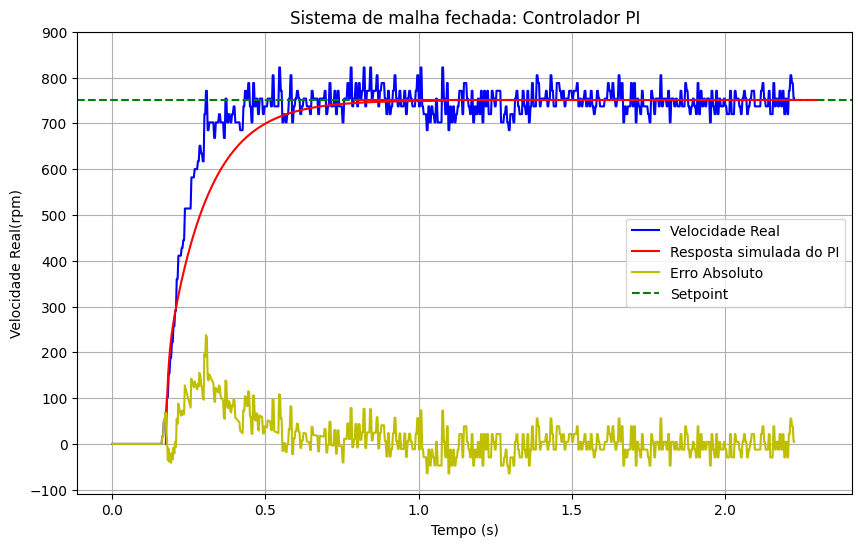

In [ ]:
# Gráfico final

import matplotlib.pyplot as plt
import control as ctrl
import numpy as np

# Criar o gráfico para Velocidade Real (RPM)
plt.figure(figsize=(10, 6))  # Tamanho da figura
plt.plot(df['Tempo_µs'], df['Vel_Real'], color='b', label='Velocidade Real')

# Obter a resposta ao degrau
time, response = ctrl.step_response(T)

x = 750
fator_tempo = 2    
fator_amplitude = x 

# Ajustando tempo e amplitude da simulação
time_sim_scaled = (time * fator_tempo)+1.75
response_sim_scaled = response * fator_amplitude

# Adicionar o gráfico da resposta ao degrau escalada
plt.plot(time_sim_scaled, response_sim_scaled, color='r', label='Resposta simulada do PI')

real_velocity = df['Vel_Real'].values  # Valores da Velocidade Real
simulated_velocity = np.interp(df['Tempo_µs'], time_sim_scaled, response_sim_scaled)  
error_absolute = real_velocity - simulated_velocity
mae = np.mean(np.abs(error_absolute))
print('Erro absoluto médio: ',mae)
plt.plot(df['Tempo_µs'], error_absolute, color='y',label="Erro Absoluto")


# Adicionar a linha horizontal no valor de y = 750
plt.axhline(y=x, color='g', linestyle='--', label='Setpoint')

x_values = np.array([8, 23])
y_values = np.array([x, x])
plt.plot(x_values, y_values, color='r')

ax = plt.gca()  
xticks = ax.get_xticks()  
ax.set_xticklabels(xticks * 0.1)  


plt.yticks(np.arange(-100, 1000, 100))

# Adicionar título e rótulos aos eixos
plt.title('Sistema de malha fechada: Controlador PI')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade Real(rpm)')

# Adicionar legenda
plt.legend()
# Adicionar uma grade ao gráfico
plt.grid(True)
#plt.xlim(0, 5)
# Mostrar o gráfico
plt.show()


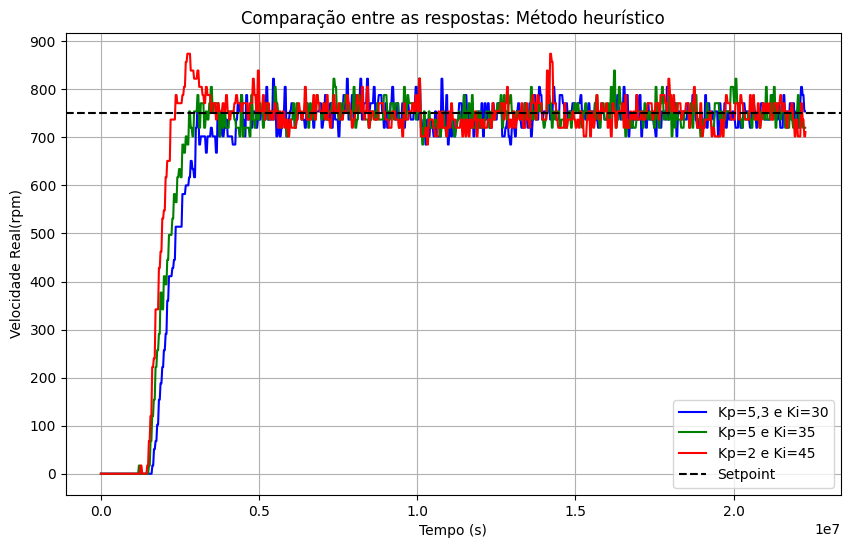

In [246]:
df_1 = pd.read_csv('dados_arduino_pid6(1).csv', encoding='ISO-8859-1') 
df_1 = df_1.rename(columns={'Tempo_s': 'Tempo_µs'})
df_1['Vel_Real_Media'] = df_1['Vel_Real'].rolling(window=10).mean()
df_1 = df_1.dropna(subset=['Vel_Real_Media'])

df_2 = pd.read_csv('dados_arduino_pid8.csv', encoding='ISO-8859-1') 
df_2 = df_2.rename(columns={'Tempo_s': 'Tempo_µs'})
df_2['Vel_Real_Media'] = df_2['Vel_Real'].rolling(window=10).mean()
df_2 = df_2.dropna(subset=['Vel_Real_Media'])

df_3 = pd.read_csv('dados_arduino_pid10.csv', encoding='ISO-8859-1') 
df_3 = df_3.rename(columns={'Tempo_s': 'Tempo_µs'})
df_3['Vel_Real_Media'] = df_3['Vel_Real'].rolling(window=10).mean()
df_3 = df_3.dropna(subset=['Vel_Real_Media'])

plt.figure(figsize=(10, 6))  # Tamanho da figura
plt.plot(df_1['Tempo_µs'], df_1['Vel_Real_Media'], color='b', label='Kp=5,3 e Ki=30')
plt.plot(df_2['Tempo_µs'], df_2['Vel_Real_Media'], color='g', label='Kp=5 e Ki=35')
plt.plot(df_3['Tempo_µs'], df_3['Vel_Real_Media'], color='r', label='Kp=2 e Ki=45')

# Adicionar a linha horizontal no valor de y = 750
plt.axhline(y=750, color='black', linestyle='--', label='Setpoint')

plt.yticks(np.arange(0, 1000, 100))

# Adicionar título e rótulos aos eixos
plt.title('Comparação entre as respostas: Método heurístico')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade Real(rpm)')

ax = plt.gca()  
xticks = ax.get_xticks()  

# Adicionar legenda
plt.legend()
plt.grid(True)
plt.show()

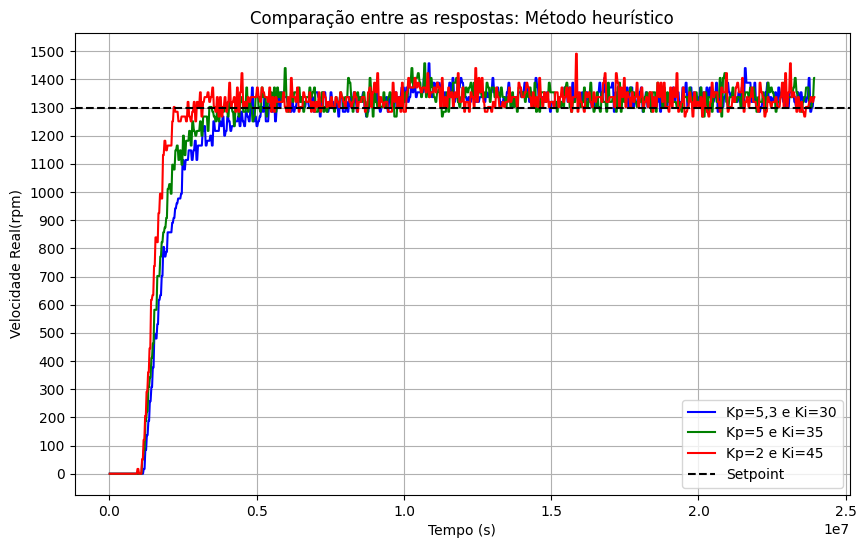

In [249]:
df_1 = pd.read_csv('dados_arduino_pid7.csv', encoding='ISO-8859-1') 
df_1 = df_1.rename(columns={'Tempo_s': 'Tempo_µs'})
df_1['Vel_Real_Media'] = df_1['Vel_Real'].rolling(window=10).mean()
df_1 = df_1.dropna(subset=['Vel_Real_Media'])

df_2 = pd.read_csv('dados_arduino_pid91.csv', encoding='ISO-8859-1') 
df_2 = df_2.rename(columns={'Tempo_s': 'Tempo_µs'})
df_2['Vel_Real_Media'] = df_2['Vel_Real'].rolling(window=10).mean()
df_2 = df_2.dropna(subset=['Vel_Real_Media'])

df_3 = pd.read_csv('dados_arduino_pid11.csv', encoding='ISO-8859-1') 
df_3 = df_3.rename(columns={'Tempo_s': 'Tempo_µs'})
df_3['Vel_Real_Media'] = df_3['Vel_Real'].rolling(window=10).mean()
df_3 = df_3.dropna(subset=['Vel_Real_Media'])

plt.figure(figsize=(10, 6))  # Tamanho da figura
plt.plot(df_1['Tempo_µs'], df_1['Vel_Real_Media'], color='b', label='Kp=5,3 e Ki=30')
plt.plot(df_2['Tempo_µs'], df_2['Vel_Real_Media'], color='g', label='Kp=5 e Ki=35')
plt.plot(df_3['Tempo_µs'], df_3['Vel_Real_Media'], color='r', label='Kp=2 e Ki=45')

# Adicionar a linha horizontal no valor de y = 750
plt.axhline(y=1300, color='black', linestyle='--', label='Setpoint')

plt.yticks(np.arange(0, 1600, 100))

# Adicionar título e rótulos aos eixos
plt.title('Comparação entre as respostas: Método heurístico')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade Real(rpm)')

ax = plt.gca()  
xticks = ax.get_xticks()  

# Adicionar legenda
plt.legend()
plt.grid(True)
plt.show()